# This  notebook is to explore various prediction models from the Used Car Price data at : https://www.kaggle.com/jpayne/852k-used-car-listings/data
Various Regression techniques are explored, including 
Deep Learning techniques and the best approach is selected based on Accuracy

In [1]:
#Import all necessary libraries
import pickle
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from keras.models import Sequential
from keras.layers import Dense   
from keras import optimizers

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Read the pre-processed pkl files

In [2]:
train_X=pd.read_pickle('C:/users/hackuser1/train_X_mileage1.pkl')
test_X=pd.read_pickle('C:/users/hackuser1/test_X_mileage1.pkl')
train_Y=pd.read_pickle('C:/users/hackuser1/train_Y_mileage1.pkl') 
test_Y=pd.read_pickle('C:/users/hackuser1/test_Y_mileage1.pkl')

print(train_X.shape)
print(test_X.shape)

(197916, 118)
(49480, 118)


We fit Sklearn LinearRegression and use this to make predictions on the test data and check the RMSE on the test data

In [3]:
#fit train data
lin_reg = LinearRegression()
lin_reg.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
#we use np.exp() to get Predicted Price, since we used log Price to train the model
carSales_predictions = lin_reg.predict(test_X)
lin_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
lin_rmse = np.sqrt(lin_mse)
print("Linear Regression rmse on Test data:"+str(lin_rmse))

Linear Regression rmse on Test data:3923.6921594651703


In [5]:
print("predicted prices")
print(np.around(np.exp(carSales_predictions[0:5])))
print("actual prices")
print(np.exp(test_Y[0:5]))

predicted prices
[[22446.]
 [13393.]
 [ 9662.]
 [13929.]
 [14493.]]
actual prices
         0
0  20952.0
1  12999.0
2   9989.0
3  12600.0
4  15501.0


In [6]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_X,train_Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [7]:
carSales_predictions = tree_reg.predict(test_X)
tree_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
tree_rmse = np.sqrt(tree_mse)
print("Decision Tree RMSE:"+str(tree_rmse))

Decision Tree RMSE:5175.364574255814


In [11]:
forest_reg_make = RandomForestRegressor()
forest_reg_make.fit(train_X,train_Y.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [12]:
carSales_predictions = forest_reg_make.predict(test_X)
forest_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regressor RMSE:"+str(forest_rmse))
print("predicted prices")
print(np.around(np.exp(carSales_predictions[0:5])))
print("actual prices")
print(np.exp(test_Y[0:5]))

Random Forest Regressor RMSE:4847.242190308035
predicted prices
[34609. 28187. 30537. 26746. 25910.]
actual prices
         0
0  34000.0
1  29797.0
2  37000.0
3  31330.0
4  16296.0


In [13]:
gbrt = GradientBoostingRegressor(max_depth=8, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(train_X, train_Y.values.ravel())
carSales_predictions = gbrt.predict(test_X)
gbrt_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
gbrt_rmse = np.sqrt(gbrt_mse)
print("Gradient Boosting Regressor RMSE:"+str(gbrt_rmse))

Gradient Boosting Regressor RMSE:4588.944936137713


We now try Deep Learning technique and compare the RMSE. We use keras with tensorflow backend 

In [10]:
model = Sequential()

#We use two hidden layers with 90 and 30 units with Relu activation, and no activation in the output layer, since 
#we want to predict the car price.
model.add(Dense(120,input_dim=(train_X.shape[1]),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(1))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 120)               14280     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 20,381
Trainable params: 20,381
Non-trainable params: 0
_________________________________________________________________


In [14]:
myOptimizer = optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=0.01, decay=0.0)
model.compile(loss='mean_squared_error', optimizer=myOptimizer, metrics=['mse'])
history = model.fit(train_X, train_Y, epochs=150,  batch_size=4000, verbose=0)

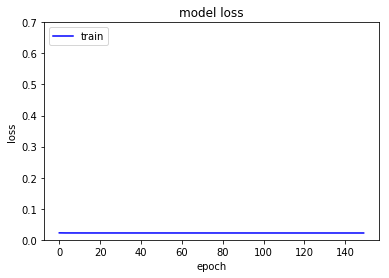

In [15]:
plt.plot(history.history['loss'], color = 'blue')
#plt.plot(history.history['val_loss'], color=  'red')
plt.ylim(0,0.7)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
carSales_predictions = model.predict(test_X)
dl_mse = mean_squared_error(np.exp(test_Y), np.exp(carSales_predictions))
dl_rmse = np.sqrt(dl_mse)
print("Deep Learning RMSE with two hidden layers:"+str(dl_rmse))

Deep Learning RMSE with two hidden layers:3723.9169202631065


We now try XGBRegressor, a latest technique. 

In [8]:
xgb_model = XGBRegressor() 
xgb_model.fit(train_X, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [9]:
carSales_predictions = xgb_model.predict(test_X)
xgb_mse = mean_squared_error(np.exp(test_Y),np.exp(carSales_predictions))
xgb_rmse = np.sqrt(xgb_mse)
print("XGB RMSE:"+str(xgb_rmse))

XGB RMSE:4218.485329118201


The conclusion is : Deep Learning gives the best accuracy with this data. However, This is not a very good RMSE, 
so we might need to model for specific Make, to make it more accurate. Since this is a MVP, we are not considering creating Predictive Model, based on specific Make.
We use the Linear Regression model to expose the Model as Web Service to be consumed by the UI layer. (This is due to certain limiations with payload size we faced with other Models)